## Importing Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression, mutual_info_regression
from sklearn.decomposition import PCA
!pip install geopandas
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt

# Data Understanding

# Weather Data Exploration

#Weather Data Set Features 

## Dataset obtained through web scraping from Current Results.

'% Sun' - % Sun number measures the percentage of time between sunrise and sunset that sunshine reaches the ground. 

'Total Sunny Hours' - Total Hours is the average number of sunny hours a place normally has in a year. 

'Clear Days'- Clear Days is the average number of days annually when cloud covers at most 30 percent of the sky during daylight hours. 

'# Days with Snow' - total amount of snow and for how many days it snows at least 0.1 inches (0.25 centimetres) in the major city 

'Inches of Snow' - The amount of snow that normally falls varies widely so it is per major city #'Avg °F' - State-wide averages of annual temperature

### Source: Current Results (November 2020, https://www.currentresults.com/)

In [2]:
#Importing in weather files.
Average_Annual_Sunshine = pd.read_csv("Average_Annual_Sunshine.csv",header=0)
Average_Annual_Temperature = pd.read_csv("Average_Annual_Temperature.csv",header=0)
Average_Yearly_Snowfall = pd.read_csv("Average_Yearly_Snowfall.csv",header=0)

#Merging the three datasets through inner joins on State
weather_data = Average_Annual_Sunshine.merge(Average_Yearly_Snowfall,how='inner',on=['State'])
weather_data = weather_data.merge(Average_Annual_Temperature,how='inner',on='State')
weather_data = weather_data.drop(columns=['Place_x', 'Place_y', 'Rank','Cen­ti­me­tres','Avg °C'])
weather_data.columns = ['State', '% Sun', 'Total Sunny Hours', 'Clear Days', '# Days with Snow', 'Inches of Snow',
       'Avg °F']
weather_data.head(5)

,State,% Sun,Total Sunny Hours,Clear Days,# Days with Snow,Inches of Snow,Avg °F
0,AL,58,2641,99,0.8,1.6,62.8
1,AK,41,2061,61,48.0,74.5,26.6
2,AZ,85,3806,193,0.3,0.3,60.3
3,AR,61,2771,123,3.8,5.2,60.4
4,CA,68,3055,146,0.0,0.0,59.4


In [3]:
# Utilize a map dataset which contains geographic information for map plotting
usa = gpd.read_file('cb_2018_us_state_500k/cb_2018_us_state_500k.shp')
usa.rename(mapper={'STUSPS':'State'}, axis=1, inplace=True)
# Because of the cost of distance, we will not consider investing in states like Alaska and Hawaii.
usa = usa[usa['State'].isin(['AK', 'HI']) == False]

#Merging weather data sets and geographic dataset
usa_weather = usa.merge(weather_data, how='inner', on=['State'])
usa_weather.head()

,STATEFP,STATENS,AFFGEOID,GEOID,State,NAME,LSAD,ALAND,AWATER,geometry,% Sun,Total Sunny Hours,Clear Days,# Days with Snow,Inches of Snow,Avg °F
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ...",61,2720,111,0.6,0.9,63.4
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ...",60,2651,109,3.9,7.6,59.0
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00257 36.52659, -103.00219 36.6...",68,3089,139,5.6,7.8,59.6
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ...",63,2829,100,6.1,10.3,55.1
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.64320 38.16909, -82.64300 38.169...",63,2829,60,37.7,62.0,51.8


Text(0.5, 1.0, '# Days with Snow')

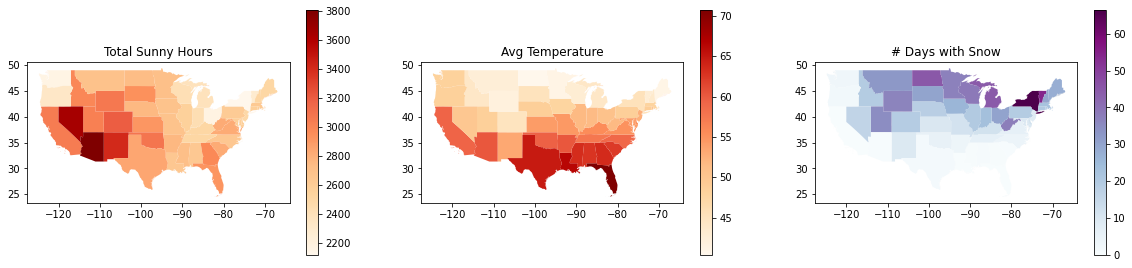

In [4]:
#Plotting weather datasets on the map for visual exploration.
fig,ax=plt.subplots(1, 3, figsize=(20, 15))
usa_weather.plot(column='Total Sunny Hours', ax=ax[0], cmap='OrRd', legend=True, legend_kwds={'shrink': 0.3})
ax[0].set_title('Total Sunny Hours')
usa_weather.plot(column='Avg °F', ax=ax[1], cmap='OrRd', legend=True, legend_kwds={'shrink': 0.3})
ax[1].set_title('Avg Temperature')
usa_weather.plot(column='# Days with Snow', ax=ax[2], cmap='BuPu', legend=True, legend_kwds={'shrink': 0.3})
ax[2].set_title('# Days with Snow')

## Feature Selection

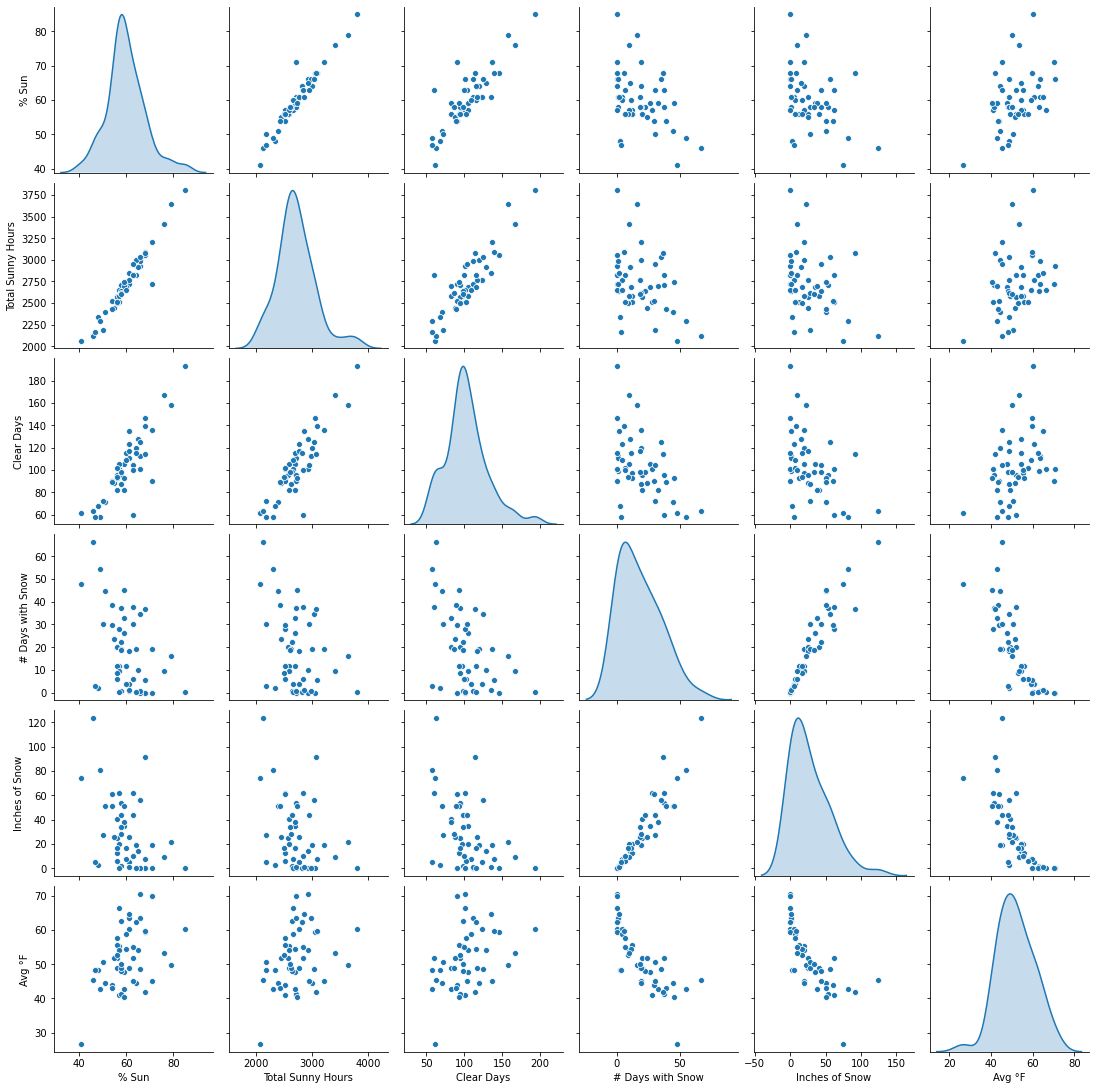

           % Sun  Total Sunny Hours  Clear Days  # Days with Snow  \
count  50.000000          50.000000   50.000000          50.00000   
mean   60.000000        2720.460000  103.260000          18.52000   
std     8.181612         346.665233   27.837583          16.62096   
min    41.000000        2061.000000   58.000000           0.00000   
25%    56.000000        2515.250000   89.250000           3.82500   
50%    59.000000        2690.500000  100.500000          17.30000   
75%    64.000000        2904.000000  115.000000          30.02500   
max    85.000000        3806.000000  193.000000          66.40000   

       Inches of Snow     Avg °F  
count       50.000000  50.000000  
mean        28.150000  51.944000  
std         27.715525   8.706581  
min          0.000000  26.600000  
25%          5.475000  45.250000  
50%         20.200000  51.200000  
75%         43.875000  58.650000  
max        123.800000  70.700000  


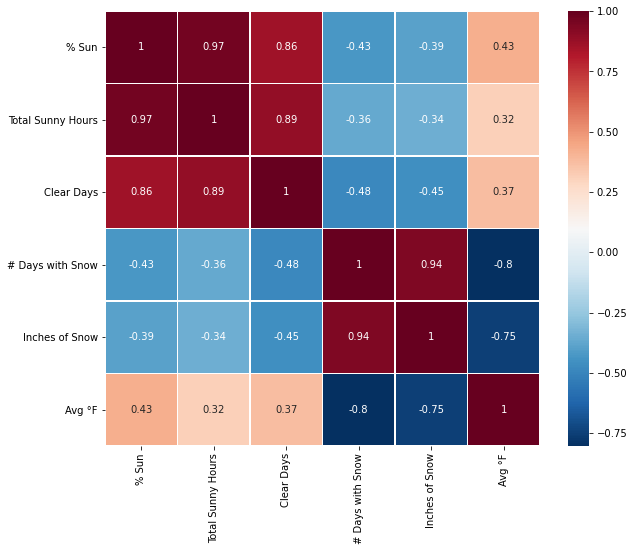

In [5]:
# Display a pairplot to look at relationships between variables
import seaborn as sns
from scipy.stats import pearsonr
sns.pairplot(data=weather_data,diag_kind='kde')
plt.show()

#Statistical analysis of the weather datasets
print(weather_data.describe())


# Examine correlations between variables using correlation matrix
from scipy.stats import pearsonr
plt.figure(figsize=(10,8))
cm = weather_data.corr(method='pearson')
sns.heatmap(cm, annot=True, cmap = 'RdBu_r',linewidth=0.5,square=True)
plt.show()

In [6]:
#From the investigation of the continous weather data, we have descided to drop inches of snow and Total Sunny Hours.
weather_data = weather_data.drop(columns=['Total Sunny Hours', 'Inches of Snow'])
weather_data['# Days with Snow'] = weather_data['# Days with Snow']*-1

## Weather Factor Feature

In [7]:
#Normalzing weather data

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
# The scaler object (model)
scaler = MinMaxScaler()
#Selected data exculding State
selected = weather_data.iloc[:,1:].copy()

#Fit and transform the data with the the model
scaled_weather_data = scaler.fit_transform(selected)

#Placing the transformed data back into a dataframe
scaled_weather_data = pd.DataFrame(scaled_weather_data)

In [8]:
#Merging original and standarise datasets
weather_data_norm = pd.concat([weather_data,scaled_weather_data],axis=1,ignore_index=True)
weather_data_norm.columns = ['State', '% Sun', 'Clear Days', '# Days with Snow', 'Avg °F','% Sun_norm', 'Clear Days_norm', '# Days with Snow_norm', 'Avg °F_norm']
weather_data_norm

,State,% Sun,Clear Days,# Days with Snow,Avg °F,% Sun_norm,Clear Days_norm,# Days with Snow_norm,Avg °F_norm
0,AL,58,99,-0.8,62.8,0.386364,0.303704,0.987952,0.820862
1,AK,41,61,-48.0,26.6,0.000000,0.022222,0.277108,0.000000
2,AZ,85,193,-0.3,60.3,1.000000,1.000000,0.995482,0.764172
3,AR,61,123,-3.8,60.4,0.454545,0.481481,0.942771,0.766440
4,CA,68,146,-0.0,59.4,0.613636,0.651852,1.000000,0.743764
5,CO,71,136,-19.1,45.1,0.681818,0.577778,0.712349,0.419501
6,CT,56,82,-20.1,49.0,0.340909,0.177778,0.697289,0.507937
7,DE,57,97,-11.8,55.3,0.363636,0.288889,0.822289,0.650794
8,FL,66,101,-0.0,70.7,0.568182,0.318519,1.000000,1.000000
9,GA,66,112,-0.7,63.5,0.568182,0.400000,0.989458,0.836735


# Technical Potential Data Exploration

## Technical Potential Data Set Features
### Some research about technical potential dataset:

- Urban Utility-scale PV:  large-scale PV deployed within urban boundaries on urban open space.

- Rural Utility-Scale PV:  large-scale PV deployed outside urban boundaries (the complement of urban utility-scale PV).

- Rooftop PV: PV deployed on floor space for commercial and residential buildings.

- CSP: Concentrating Solar Power,  power from a utility-scale solar power facility in which the solar heat energy is collected in a central location. 

For each of these four parts, there are available land area(km2), installed capacity(GW) and **electric generation(GWh)**, the later feature is what really matter to our target.

"The estimates do not consider (in most cases) economic or market constraints, and therefore do not represent a level of renewable generation that might actually be deployed. "

###Source: Refer to U.S. Renewable Energy Technical Potentials: A GIS-Based Analysis Anthony Lopez, Billy Roberts, Donna Heimiller, Nate Blair, and Gian Porro. (November 2020, https://www.nrel.gov/docs/fy12osti/51946.pdf)

## Data processing

In [9]:
tech_pot = pd.read_csv("usretechnicalpotential.csv", header=1)
tech_pot.head()
tech_pot.columns

Index(['State', 'Urban Utility-scale PV (GWh)', 'Urban Utility-scale PV (GW)',
       'Urban Utility-scale PV (km2)', 'Rural Utility-scale PV (GWh)',
       'Rural Utility-scale PV (GW)', 'Rural Utility-scale PV (km2)',
       'Rooftop PV (GWh)', 'Rooftop PV (GW)', 'CSP (GWh)', 'CSP (GW)',
       'CSP (km2)', 'Onshore Wind (GWh)', 'Onshore Wind (GW)',
       'Onshore Wind (km2)', 'Offshore Wind (GWh)', 'Offshore Wind (GW)',
       'Offshore Wind (km2)', 'Biopower-Solid (GWh)', 'Biopower-Solid (GW)',
       'Biopower-Solid (BDT)', 'Biopower-Gaseous (GWh)',
       'Biopower-Gaseous (GW)', 'Biopower-Gaseous (Tonnes-CH4)',
       'Geothermal Hydrothermal (GWh)', 'Geothermal Hydrothermal (GW)',
       'EGS Geothermal (GWh)', 'EGS Geothermal (GW)', 'Hydropower (GWh)',
       'Hydropower (GW)', 'Hydropower (Count of Sites)'],
      dtype='object')

In [10]:
# Select columns that matters: Urban Utility-scale PV(GWh), Rural Utility-scale PV(GWh), Rooftop PV(GWh) and CSP(GWh)
useful_var = ['State', 'Urban Utility-scale PV (GWh)', 'Rural Utility-scale PV (GWh)', 'Rooftop PV (GWh)', 'CSP (GWh)']
tech_pot = tech_pot[useful_var]
# Convert type to numeric types

# Fill null with median of all the states
for col in ['Urban Utility-scale PV (GWh)', 'Rural Utility-scale PV (GWh)', 'Rooftop PV (GWh)', 'CSP (GWh)']:
    tech_pot[col] = tech_pot[col].loc[~tech_pot[col].isnull()].str.replace(r',', '')
    tech_pot[col] = pd.to_numeric(tech_pot[col], errors='coerce')
    mean = tech_pot.loc[tech_pot['State'] == 'TOTAL'][col]
    tech_pot[col].fillna(mean.iloc[0]/(tech_pot.shape[0] - 1), inplace=True)

# Rename these columns to make them more understandable
tech_pot.rename(mapper={"Urban Utility-scale PV (GWh)": "Urban_Electric_Generation"}, axis=1, inplace=True)
tech_pot.rename(mapper={"Rural Utility-scale PV (GWh)": "Rural_Electric_Generation"}, axis=1, inplace=True)
tech_pot.rename(mapper={"Rooftop PV (GWh)": "Rooftop_Electric_Generation"}, axis=1, inplace=True)
tech_pot.rename(mapper={"CSP (GWh)": "CSP_Electric_Generation"}, axis=1, inplace=True)
tech_pot.head()


,State,Urban_Electric_Generation,Rural_Electric_Generation,Rooftop_Electric_Generation,CSP_Electric_Generation
0,Alabama,35851,3706839,15476.000000,0
1,Alaska,166,8282976,16053.588235,0
2,Arizona,121306,11867694,22736.000000,12544334
3,Arkansas,28961,4986389,8485.000000,0
4,California,246008,8855917,106411.000000,8490916


In [11]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}
# Convert full states name here to 2-letter abbreviation
tech_pot['State'] = tech_pot['State'].map(us_state_abbrev)
tech_pot.head()

,State,Urban_Electric_Generation,Rural_Electric_Generation,Rooftop_Electric_Generation,CSP_Electric_Generation
0,AL,35851,3706839,15476.000000,0
1,AK,166,8282976,16053.588235,0
2,AZ,121306,11867694,22736.000000,12544334
3,AR,28961,4986389,8485.000000,0
4,CA,246008,8855917,106411.000000,8490916


## Data Visualization

Text(0.5, 1.0, 'Proportion Of Diff Solar Enery')

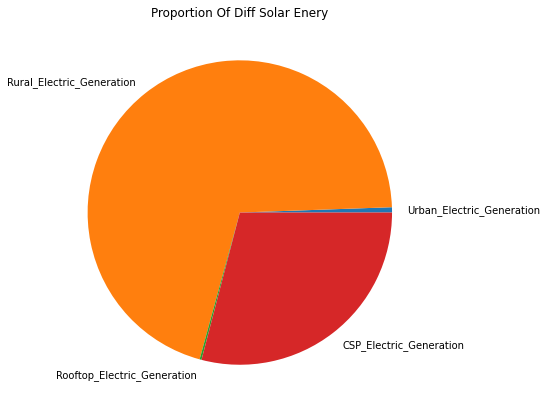

In [12]:
# See the proportion of different solar energy
total = tech_pot.iloc[-1, 1:]
total.index
fig = plt.figure(figsize = (10, 7))
plt.pie(total.array, labels = total.index)
plt.title('Proportion Of Diff Solar Enery')

From the above pie chart, we can see that rural solar energy and Concentrating Solar Power take a dominant proportion in all forms of solar power. It indicates that rural is the place to install large-scale solar panel and states with larger rural electric generation potential has larger value to be invested in.

In [13]:
usa_tech_pot = usa.merge(tech_pot[['State','Urban_Electric_Generation', 'Rural_Electric_Generation', 'Rooftop_Electric_Generation', 'CSP_Electric_Generation']],
               how='inner',
               on=['State'])
# Because of the cost of distance, we will not consider investing in states like Alaska and Hawaii.
usa_tech_pot = usa_tech_pot[usa_tech_pot['State'].isin(['AK', 'HI']) == False]
usa_tech_pot.head()

,STATEFP,STATENS,AFFGEOID,GEOID,State,NAME,LSAD,ALAND,AWATER,geometry,Urban_Electric_Generation,Rural_Electric_Generation,Rooftop_Electric_Generation,CSP_Electric_Generation
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ...",26366,4981252,8614.0,0
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ...",68346,4232790,28420.0,0
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00257 36.52659, -103.00219 36.6...",50041,9341920,12443.0,5068036
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ...",27451,1882467,22267.0,0
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.64320 38.16909, -82.64300 38.169...",3024,52694,4220.0,0


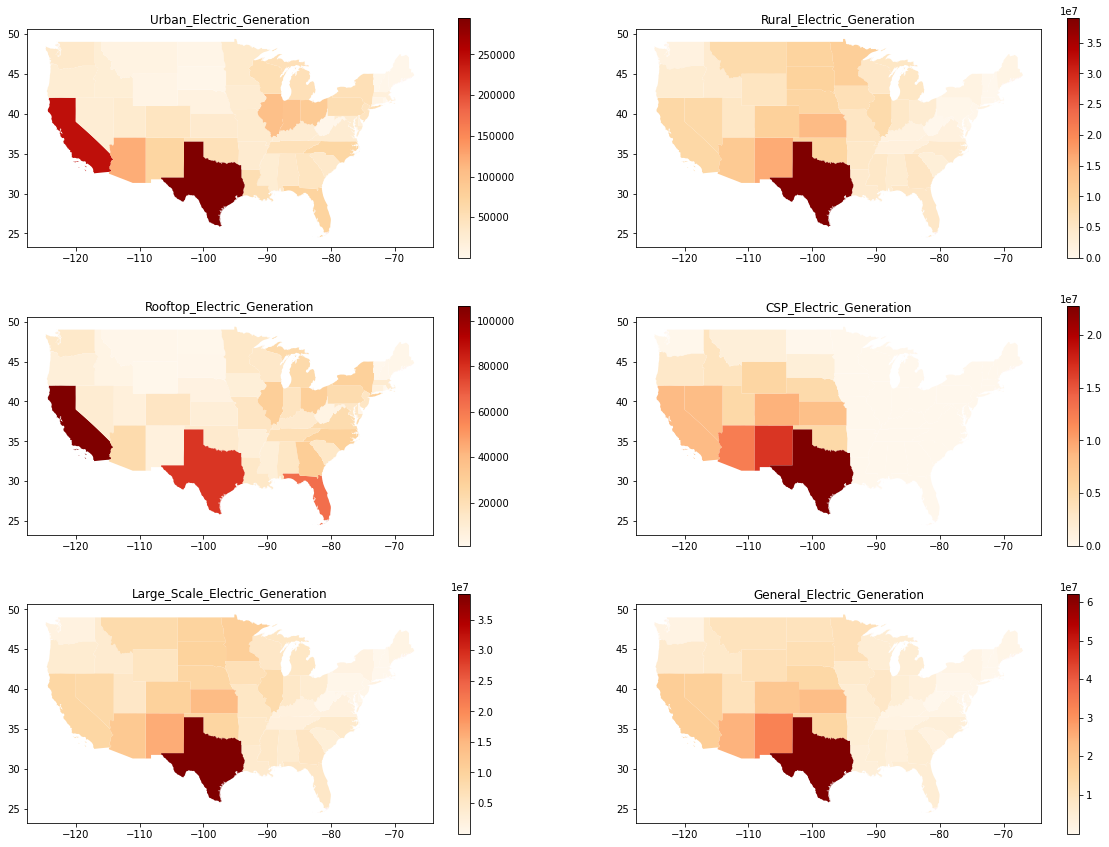

In [14]:
usa_tech_pot['General_Electric_Generation'] = usa_tech_pot['Urban_Electric_Generation'] + usa_tech_pot['Rural_Electric_Generation'] + usa_tech_pot['Rooftop_Electric_Generation'] + usa_tech_pot['CSP_Electric_Generation']
usa_tech_pot['Large_Scale_Electric_Generation'] = usa_tech_pot['Urban_Electric_Generation'] + usa_tech_pot['Rural_Electric_Generation']

fig,ax = plt.subplots(3, 2, figsize=(20,15))
for i,col in enumerate(['Urban_Electric_Generation', 'Rural_Electric_Generation', 'Rooftop_Electric_Generation', 'CSP_Electric_Generation'
                       ,'Large_Scale_Electric_Generation', 'General_Electric_Generation']):
    axis = ax[i//2, i%2]
    usa_tech_pot.plot(column=col, ax=axis, cmap='OrRd', legend=True)
    axis.set_title(col)

From the above maps, we can see that most south-eastern states perform well, which may own to the sunlight-friendly geolocation. From root-top electric generation and CSP electric generation map, it is obvious that most states in the east has much more energy potential on root-top PV compared to Concentrating Solar Power. This may because cities in the east are too concentrated to find sufficient space for large-scale solar technology installation.

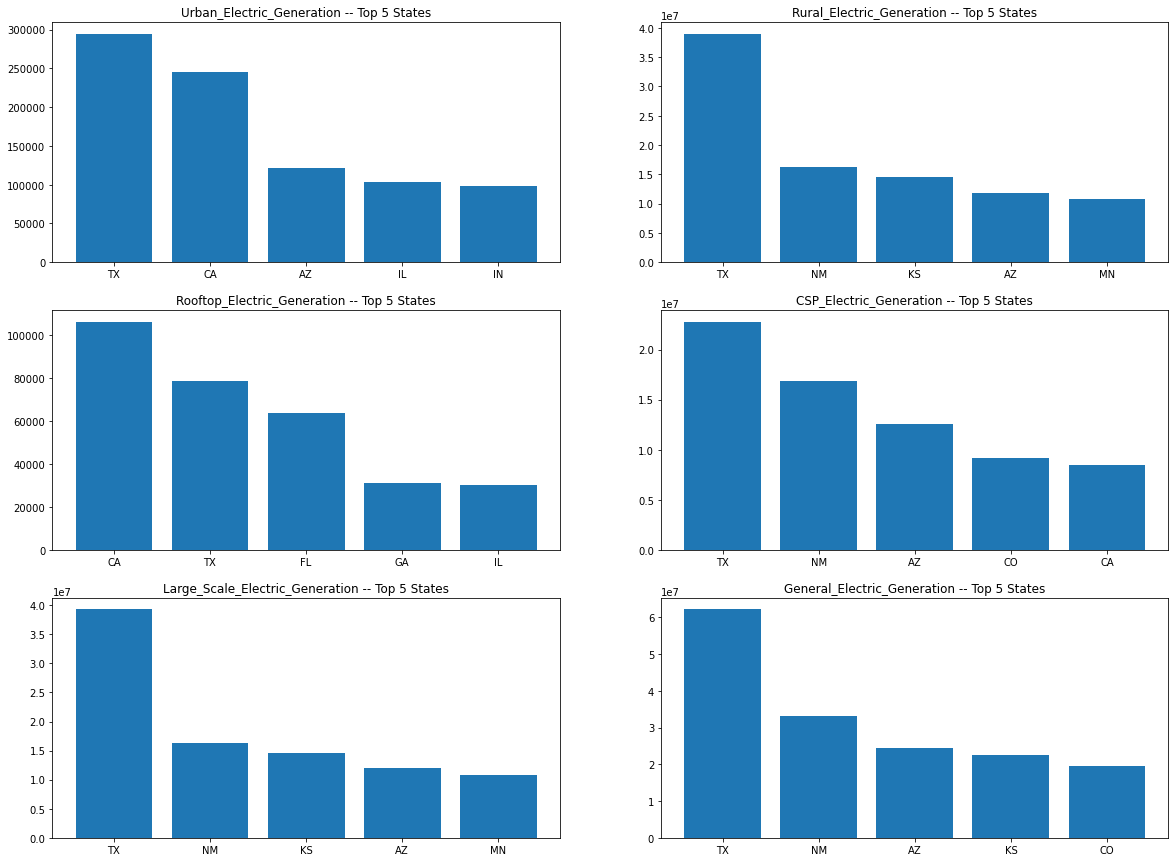

In [15]:
fig,ax = plt.subplots(3, 2, figsize = (20, 15))
for i, col in enumerate(['Urban_Electric_Generation', 'Rural_Electric_Generation', 'Rooftop_Electric_Generation', 'CSP_Electric_Generation'
                       ,'Large_Scale_Electric_Generation', 'General_Electric_Generation']):
    ranking = usa_tech_pot.sort_values(by=[col], axis=0, ascending=False)
    axis = ax[i//2, i%2]
    axis.bar(x=ranking.iloc[:5]['State'], height=ranking.iloc[:5][col])
    axis.set_title(col + ' -- Top 5 States')

For general electric generation potential, we simply add all the four categories together(rural large-scal PV, urban large-scale PV, roof-top PV and CSP). Texas, New Mexico, Arizona, Kansas and Colorado rank the highest 5 states. And it's true that states dominate on rural electric generation dominate general electric generation.

# Electricity Price Data Exploration

## Electricity Price Data Set Features

### This dataset represents the average annual electricity price by state by provider and tracks detailed state data on electricity rates from 1990-2019.

###Features:
Year - from 1990-2019

State - all US states

Industry Sector Category: The provider category for each electricity price (Delivery-Only Service, Energy-Only Providers, Full-Service Providers, Restructured Retail Service Providers, Total Electric Industry).

Residential - average price (cents/KWH) per state for the residential sector

Commercial - average price (cents/KWH) per state for the commercial sector

Industrial - average price (cents/KWH) per state for the industrial sector

Transportation - average price (cents/KWH) per state for the transportation sector

Other - average price (cents/KWH) per state for other sectors

Total - average total price (cents/KWH) per state for all sectors

###Source: U.S. Energy Information Administration (November 2020)

## Data Processing

In [16]:
# Remove header from data frame so that the header is now the first row of the df
electricity_price = pd.read_csv("avgprice_annual.csv", header = None)

# Drop first row of df
electricity_price = electricity_price.drop([0])

# Turn first row into our column names
electricity_price.columns = electricity_price.iloc[0]

# Drop duplicate row 1
electricity_price = electricity_price.drop([1])

#electricity_price.head()

In [17]:
# Remove commas in dataset then convert numeric columns from strings to floats
electricity_price['Commercial'] = electricity_price['Commercial'].astype(str).str.replace(',', '')
electricity_price[['Year', 'Residential', 'Commercial', 'Industrial', 'Transportation', 'Other', 'Total']] = electricity_price[['Year', 'Residential', 'Commercial', 'Industrial', 'Transportation', 
                                       'Other', 'Total']].astype(float)
#electricity_price.dtypes

In [18]:
# Filter df to find data for 2019 and Total Electric Industry to explore in visualization bar chart
ep_filt = electricity_price.loc[(electricity_price['Year'] == 2019) & 
                                (electricity_price['Industry Sector Category'] == 'Total Electric Industry'), :]
#ep_filt.head()

In [19]:
# Look at average total electricity price over all years by state - group by state and take 
    # the mean of total electricity price for each state for visualization bar chart as compared to 2019 bar chart
ep_avg = electricity_price.groupby('State')['Total'].agg('mean')
ep_avg = pd.DataFrame(ep_avg)
#ep_avg.head()

In [20]:
# Create new dataset to look at segmentation prices in all states in 2019 with stacked bar plot and compare to all years (1990-2019)
ep_filt2 = ep_filt.set_index('State')
ep_filt2 = ep_filt2[['Residential', 'Commercial', 'Industrial', 'Transportation', 'Other', 'Total']]
ep_filt2 = pd.DataFrame(ep_filt2)
#ep_filt2.head(10)

# Find the mean of all states in 2019 by provider to visualize in bar plot 
pie_filt = ep_filt2.mean(axis = 0) 
#print(pie_filt)

# Look at average total electricity price over all years by state - group by state and take 
    # the mean of all sector electricity price for each state to visualize in stacked bar plot compared to 2019 stacked bar plot viaualization
all_avg = electricity_price.groupby('State')['Residential', 'Commercial', 'Industrial', 'Transportation', 'Other','Total'].agg('mean')
all_avg = pd.DataFrame(all_avg)
#all_avg.head()

# Find the mean of all states from 1990-2019 by provider to compare to 2019 bar plot (pie_filt)
pie_all = all_avg.mean(axis = 0) 
#print(pie_all)

<ipython-input-20-b10ae1c055c6>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  all_avg = electricity_price.groupby('State')['Residential', 'Commercial', 'Industrial', 'Transportation', 'Other','Total'].agg('mean')


In [21]:
# Create a new df from ep_filt2 for visual analysis to explore whether filtering provider to total electric industry is a valid approach in feature selection
ep_sect= electricity_price[['Year', 'State', 'Industry Sector Category','Total']]

In [22]:
# Create a new dataframe to visualize bar plot of top 5 states' electricity prices from total electric industry and total average price to look for potential variation
# Filter df to find data for 2019, TX, and Total Electric Industry
ep_TX = electricity_price.loc[(electricity_price['Year'] == 2019) & 
                                (electricity_price['Industry Sector Category'] == 'Total Electric Industry')&
                                   (electricity_price['State'] == 'TX'), :]
#ep_TX.head()

# Filter df to find data for 2019, FL, and Total Electric Industry
ep_FL = electricity_price.loc[(electricity_price['Year'] == 2019) & 
                                (electricity_price['Industry Sector Category'] == 'Total Electric Industry')&
                                   (electricity_price['State'] == 'FL'), :]
#ep_FL.head()

# Filter df to find data for 2019, CA, and Total Electric Industry
ep_CA = electricity_price.loc[(electricity_price['Year'] == 2019) & 
                                (electricity_price['Industry Sector Category'] == 'Total Electric Industry')&
                                   (electricity_price['State'] == 'CA'), :]
#ep_CA.head()

# Filter df to find data for 2019, SC, and Total Electric Industry
ep_SC = electricity_price.loc[(electricity_price['Year'] == 2019) & 
                                (electricity_price['Industry Sector Category'] == 'Total Electric Industry')&
                                   (electricity_price['State'] == 'SC'), :]
#ep_SC.head()

# Filter df to find data for 2019, NY, and Total Electric Industry
ep_NY = electricity_price.loc[(electricity_price['Year'] == 2019) & 
                                (electricity_price['Industry Sector Category'] == 'Total Electric Industry')&
                                   (electricity_price['State'] == 'NY'), :]
#ep_NY.head()

# Merge df's (using outer to get union) to see data for the top 5 states in 2019
merged_df = pd.concat([ep_TX, ep_FL, ep_CA, ep_SC, ep_NY])

# Drop year (2019), industry sector category (Total industry) and total
merged_dfS = merged_df[['State', 'Residential', 'Commercial', 'Industrial']]
merged_dfS = merged_df.set_index('State')
#merged_dfS.head()

In [23]:
# Create a new dataframe to visualize line plot of provider prices per top 5 performing states from 2015-2019 
# Filter df to find data for 2015, TX, and Total Electric Industry
ep_TX_y15 = electricity_price.loc[(electricity_price['Year'] == 2015) & 
                                (electricity_price['Industry Sector Category'] == 'Total Electric Industry')&
                                   (electricity_price['State'] == 'TX'), :]
#print(ep_TX_y15.head())

# Filter df to find data for 2016, TX, and Total Electric Industry
ep_TX_y16 = electricity_price.loc[(electricity_price['Year'] == 2016) & 
                                (electricity_price['Industry Sector Category'] == 'Total Electric Industry')&
                                   (electricity_price['State'] == 'TX'), :]
#print(ep_TX_y16.head())

# Filter df to find data for 2017, TX, and Total Electric Industry
ep_TX_y17 = electricity_price.loc[(electricity_price['Year'] == 2017) & 
                                (electricity_price['Industry Sector Category'] == 'Total Electric Industry')&
                                   (electricity_price['State'] == 'TX'), :]
#print(ep_TX_y17.head())

# Filter df to find data for 2018, TX, and Total Electric Industry
ep_TX_y18 = electricity_price.loc[(electricity_price['Year'] == 2018) & 
                                (electricity_price['Industry Sector Category'] == 'Total Electric Industry')&
                                   (electricity_price['State'] == 'TX'), :]
#print(ep_TX_y18.head())

# Filter df to find data for 2019, TX, and Total Electric Industry
ep_TX_y19 = electricity_price.loc[(electricity_price['Year'] == 2019) & 
                                (electricity_price['Industry Sector Category'] == 'Total Electric Industry')&
                                   (electricity_price['State'] == 'TX'), :]
#print(ep_TX_y15.head())

# Merge TX dataframes from 2015-2019
merged_df_TXy = pd.concat([ep_TX_y15, ep_TX_y16, ep_TX_y17, ep_TX_y18, ep_TX_y19])
#merged_df_TXy

# Filter df to find data for 2015, FL, and Total Electric Industry
ep_FL_y15 = electricity_price.loc[(electricity_price['Year'] == 2015) & 
                                (electricity_price['Industry Sector Category'] == 'Total Electric Industry')&
                                   (electricity_price['State'] == 'FL'), :]
#print(ep_FL_y15.head())

# Filter df to find data for 2016, FL, and Total Electric Industry
ep_FL_y16 = electricity_price.loc[(electricity_price['Year'] == 2016) & 
                                (electricity_price['Industry Sector Category'] == 'Total Electric Industry')&
                                   (electricity_price['State'] == 'FL'), :]
#print(ep_FL_y16.head())

# Filter df to find data for 2017, FL, and Total Electric Industry
ep_FL_y17 = electricity_price.loc[(electricity_price['Year'] == 2017) & 
                                (electricity_price['Industry Sector Category'] == 'Total Electric Industry')&
                                   (electricity_price['State'] == 'FL'), :]
#print(ep_FL_y17.head())


# Filter df to find data for 2018, FL, and Total Electric Industry
ep_FL_y18 = electricity_price.loc[(electricity_price['Year'] == 2018) & 
                                (electricity_price['Industry Sector Category'] == 'Total Electric Industry')&
                                   (electricity_price['State'] == 'FL'), :]
#print(ep_FL_y18.head())

# Filter df to find data for 2019, FL, and Total Electric Industry
ep_FL_y19 = electricity_price.loc[(electricity_price['Year'] == 2019) & 
                                (electricity_price['Industry Sector Category'] == 'Total Electric Industry')&
                                   (electricity_price['State'] == 'FL'), :]
#print(ep_FL_y19.head())

# Merge FL dataframes from 2015-2019
merged_df_FLy = pd.concat([ep_FL_y15, ep_FL_y16, ep_FL_y17, ep_FL_y18, ep_FL_y19])
#merged_df_FLy

# Filter df to find data for 2015, CA, and Total Electric Industry
ep_CA_y15 = electricity_price.loc[(electricity_price['Year'] == 2015) & 
                                (electricity_price['Industry Sector Category'] == 'Total Electric Industry')&
                                   (electricity_price['State'] == 'CA'), :]
#print(ep_CA_y15.head())

# Filter df to find data for 2016, CA, and Total Electric Industry
ep_CA_y16 = electricity_price.loc[(electricity_price['Year'] == 2016) & 
                                (electricity_price['Industry Sector Category'] == 'Total Electric Industry')&
                                   (electricity_price['State'] == 'CA'), :]
#print(ep_CA_y16.head())

# Filter df to find data for 2017, CA, and Total Electric Industry
ep_CA_y17 = electricity_price.loc[(electricity_price['Year'] == 2017) & 
                                (electricity_price['Industry Sector Category'] == 'Total Electric Industry')&
                                   (electricity_price['State'] == 'CA'), :]
#print(ep_CA_y17.head())


# Filter df to find data for 2018, FL, and Total Electric Industry
ep_CA_y18 = electricity_price.loc[(electricity_price['Year'] == 2018) & 
                                (electricity_price['Industry Sector Category'] == 'Total Electric Industry')&
                                   (electricity_price['State'] == 'CA'), :]
#print(ep_CA_y18.head())

# Filter df to find data for 2019, FL, and Total Electric Industry
ep_CA_y19 = electricity_price.loc[(electricity_price['Year'] == 2019) & 
                                (electricity_price['Industry Sector Category'] == 'Total Electric Industry')&
                                   (electricity_price['State'] == 'CA'), :]
#print(ep_CA_y19.head())

# Merge CA dataframes from 2015-2019
merged_df_CAy = pd.concat([ep_CA_y15, ep_CA_y16, ep_CA_y17, ep_CA_y18, ep_CA_y19])
#merged_df_CAy

# Filter df to find data for 2015, SC, and Total Electric Industry
ep_SC_y15 = electricity_price.loc[(electricity_price['Year'] == 2015) & 
                                (electricity_price['Industry Sector Category'] == 'Total Electric Industry')&
                                   (electricity_price['State'] == 'SC'), :]
#print(ep_SC_y15.head())

# Filter df to find data for 2016, SC, and Total Electric Industry
ep_SC_y16 = electricity_price.loc[(electricity_price['Year'] == 2016) & 
                                (electricity_price['Industry Sector Category'] == 'Total Electric Industry')&
                                   (electricity_price['State'] == 'SC'), :]
#print(ep_SC_y16.head())

# Filter df to find data for 2017, SC, and Total Electric Industry
ep_SC_y17 = electricity_price.loc[(electricity_price['Year'] == 2017) & 
                                (electricity_price['Industry Sector Category'] == 'Total Electric Industry')&
                                   (electricity_price['State'] == 'SC'), :]
#print(ep_SC_y17.head())


# Filter df to find data for 2018, SC, and Total Electric Industry
ep_SC_y18 = electricity_price.loc[(electricity_price['Year'] == 2018) & 
                                (electricity_price['Industry Sector Category'] == 'Total Electric Industry')&
                                   (electricity_price['State'] == 'SC'), :]
#print(ep_SC_y18.head())

# Filter df to find data for 2019, SC, and Total Electric Industry
ep_SC_y19 = electricity_price.loc[(electricity_price['Year'] == 2019) & 
                                (electricity_price['Industry Sector Category'] == 'Total Electric Industry')&
                                   (electricity_price['State'] == 'SC'), :]
#print(ep_SC_y19.head())

# Merge SC dataframes from 2015-2019
merged_df_SCy = pd.concat([ep_SC_y15, ep_SC_y16, ep_SC_y17, ep_SC_y18, ep_SC_y19])
#merged_df_SCy

# Filter df to find data for 2015, NY, and Total Electric Industry
ep_NY_y15 = electricity_price.loc[(electricity_price['Year'] == 2015) & 
                                (electricity_price['Industry Sector Category'] == 'Total Electric Industry')&
                                   (electricity_price['State'] == 'NY'), :]
#print(ep_NY_y15.head())

# Filter df to find data for 2016, NY, and Total Electric Industry
ep_NY_y16 = electricity_price.loc[(electricity_price['Year'] == 2016) & 
                                (electricity_price['Industry Sector Category'] == 'Total Electric Industry')&
                                   (electricity_price['State'] == 'NY'), :]
#print(ep_NY_y16.head())

# Filter df to find data for 2017, NY, and Total Electric Industry
ep_NY_y17 = electricity_price.loc[(electricity_price['Year'] == 2017) & 
                                (electricity_price['Industry Sector Category'] == 'Total Electric Industry')&
                                   (electricity_price['State'] == 'NY'), :]
#print(ep_NY_y17.head())


# Filter df to find data for 2018, NY, and Total Electric Industry
ep_NY_y18 = electricity_price.loc[(electricity_price['Year'] == 2018) & 
                                (electricity_price['Industry Sector Category'] == 'Total Electric Industry')&
                                   (electricity_price['State'] == 'NY'), :]
#print(ep_NY_y18.head())

# Filter df to find data for 2019, NY, and Total Electric Industry
ep_NY_y19 = electricity_price.loc[(electricity_price['Year'] == 2019) & 
                                (electricity_price['Industry Sector Category'] == 'Total Electric Industry')&
                                   (electricity_price['State'] == 'NY'), :]
#print(ep_NY_y19.head())

# Merge NY dataframes from 2015-2019
merged_df_NYy = pd.concat([ep_NY_y15, ep_NY_y16, ep_NY_y17, ep_NY_y18, ep_NY_y19])
#merged_df_NYy

# Merge df's (using outer to get union) to see data for the top 5 states from 2015-2019
merged_dfy = pd.concat([merged_df_TXy, merged_df_FLy, merged_df_CAy, merged_df_SCy, merged_df_NYy])

# Drop industry sector category (Total industry) since it's the same for entire df
merged_dfy = merged_dfy[['Year','State', 'Total']]
merged_dfy = merged_dfy.set_index('State')
#merged_dfy.head()

In [24]:
# Create final dataset for electricity price based on data exploration and feature selection of year 2019, total electric industry, and total average price
# Filter 2017 dataset to calculate a new column in final dataset to calculate % price change in the past 3 years
ep_filt17 = electricity_price.loc[(electricity_price['Year'] == 2017) & 
                                (electricity_price['Industry Sector Category'] == 'Total Electric Industry'), :]
ep_filt17 = ep_filt17[['State', 'Total']]
ep_filt17 = ep_filt17.rename(columns = {'Total': 'Total Average Price 2017 (Cents/KWH)'})
#ep_filt17.head()

# Filter 2019 dataset to calculate a new column in final dataset to calculate % price change in the past 3 years
ep_filt19 = ep_filt[['State', 'Total']]
ep_filt19 = ep_filt19.rename(columns = {'Total': 'Total Average Price 2019 (Cents/KWH)'})
#ep_filt19.head()

# Merge 2017 and 2019 filtered datasets
merge_17_19 = ep_filt19.merge(ep_filt17, how = 'inner')
merge_17_19.head()

# Create new column for calculated percent change from 2017-2019
    # We want to understand how total electric prices have changed over time, from 2017-2019
merge_17_19['% change in price (17-19)'] = 100*((merge_17_19['Total Average Price 2019 (Cents/KWH)'] - merge_17_19['Total Average Price 2017 (Cents/KWH)'])/merge_17_19['Total Average Price 2017 (Cents/KWH)'])
merge_17_19['AV % change in price (17-19)'] = merge_17_19['% change in price (17-19)'].abs() 
# Rename final df
ep_final = merge_17_19

# Drop US values because we only want states
ep_final = ep_final.drop([51])

# Normalize total average price in 2019 
ep_final['Total Average Price 2019 - Norm'] = (ep_final['Total Average Price 2019 (Cents/KWH)'] - ep_final['Total Average Price 2019 (Cents/KWH)'].min()) / (ep_final['Total Average Price 2019 (Cents/KWH)'].max() - ep_final['Total Average Price 2019 (Cents/KWH)'].min())
ep_final.head()

1,State,Total Average Price 2019 (Cents/KWH),Total Average Price 2017 (Cents/KWH),% change in price (17-19),AV % change in price (17-19),Total Average Price 2019 - Norm
0,AK,20.22,19.10,5.863874,5.863874,0.595431
1,AL,9.83,9.83,0.000000,0.000000,0.100904
2,AR,8.22,8.26,-0.484262,0.484262,0.024274
3,AZ,10.52,10.64,-1.127820,1.127820,0.133746
4,CA,16.89,16.06,5.168120,5.168120,0.436935


## Data Visualization

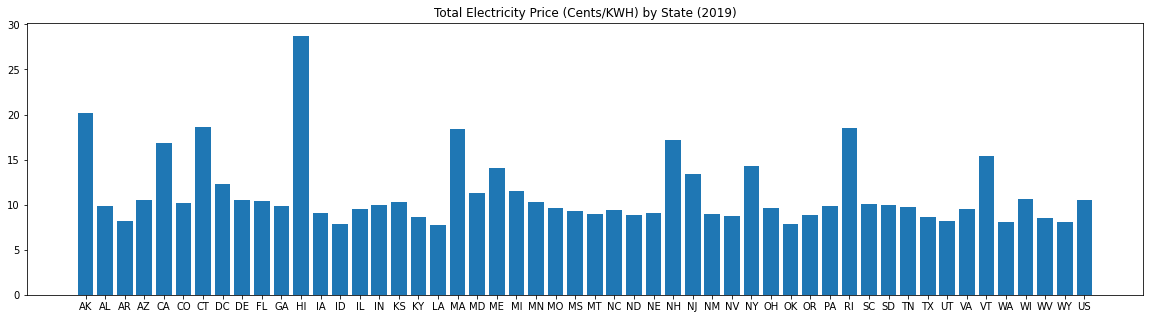

In [25]:
# Plot total electricity price x state for 2019
plt.figure(figsize = (20, 5))
plt.bar(ep_filt['State'], ep_filt['Total'])
plt.title('Total Electricity Price (Cents/KWH) by State (2019)')
plt.show()

For data exploration of our average electricity price dataset, we explored total electricity price by state in 2019. This bar plot shows that Hawaii, Alaska, Connecticut, Rhode Island, Massachusetts, and New Hampshire have the highest total electricity prices by state in 2019. We will compare it to electricity price by state from all years (1990-2019) below.

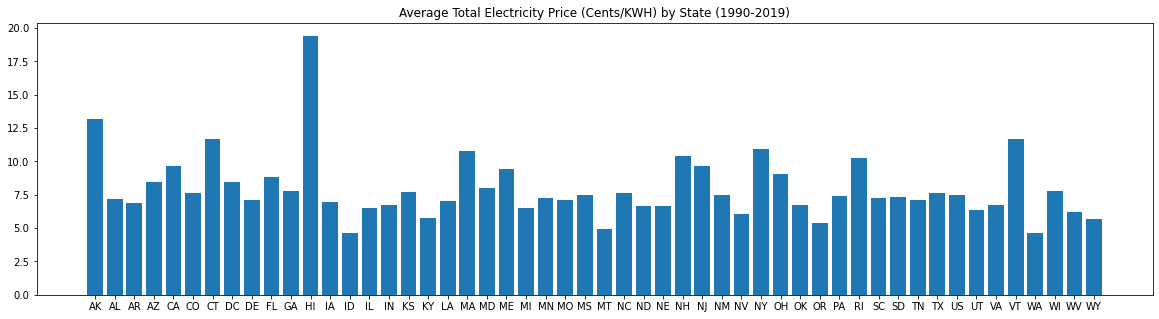

In [26]:
# Plot total average electricity price x state from 1990-2019
plt.figure(figsize = (20, 5))
plt.bar(ep_avg.index, ep_avg['Total'])
plt.title('Average Total Electricity Price (Cents/KWH) by State (1990-2019)')
plt.show()

To follow up our data exploration above, we explored total electricity price by state from 1990-2019. This bar plot shows that Hawaii and Alaska have had the highest electricity prices historically and match up to what we see in 2019. However, Massachusetts, New Hampshire, Rhode Island and Vermont do not show as significant of a price difference historically versus 2019.

Text(0.5, 1.0, 'Average Electricity Price (Cents/KWH) by Segmentation (2019)')

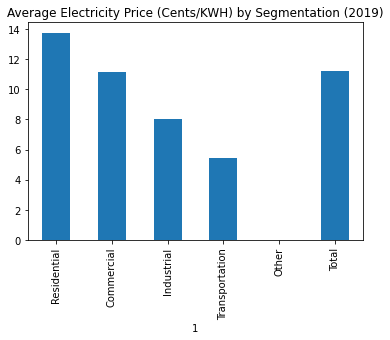

In [27]:
# Create bar plot of the mean of all states in 2019 by sector
pie_filt.plot(kind="bar")
plt.title('Average Electricity Price (Cents/KWH) by Segmentation (2019)')

To continue our data exploration, we looked at average electricity price using the mean of all states in 2019 by sector. Here we can see that the residential sector has the highest electricity price of all sectors in 2019. We can also see that the total average price appears to represent a weighted average of all sectors - this led us to consider selecting only total average price in our final data frame.

Text(0.5, 1.0, 'Average Electricity Price (Cents/KWH) by Segmentation (1990-2019)\n')

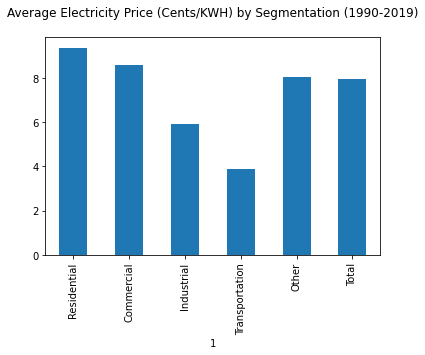

In [28]:
# Create bar plot of the mean of all states from 1990-2019 by provider
pie_all.plot(kind="bar")
plt.title('Average Electricity Price (Cents/KWH) by Segmentation (1990-2019)\n')

Again, to compare for visual exploration against average price for all years (1990-2019) to see changes over time, we see that other sectors had a much higher price historically, where in 2019, it's almost non-existent. There has been a clear historical change in electricity prices by sector when compared to 2019.

Text(0.5, 1.0, 'Average Total Electricity Price (Cents/KWH) by Year by Provider (1990-2019)')

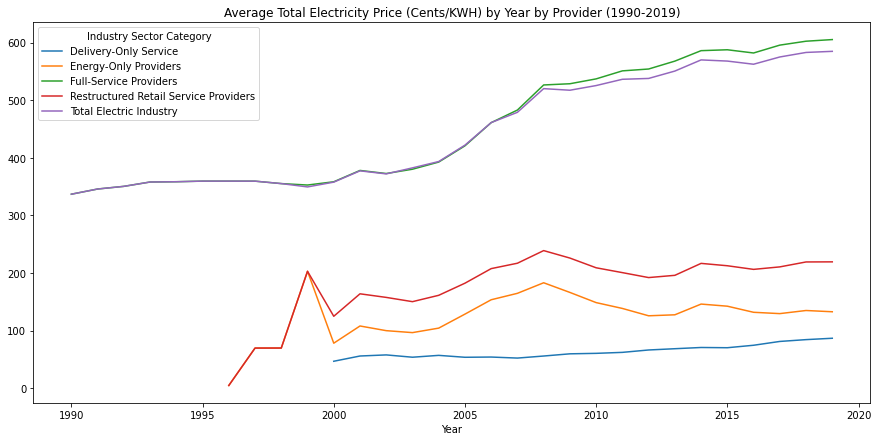

In [29]:
# Groupby Industry sector category and state to get the mean of each state for each sector, then create 
    # plot
ig, ax = plt.subplots(figsize=(15,7))
ep_sect.groupby(['Year', 'Industry Sector Category', ])['Total'].agg('sum').unstack().plot(ax = ax)
plt.title('Average Total Electricity Price (Cents/KWH) by Year by Provider (1990-2019)')

We also wanted to explore our average total electricity price by provider to see if our assumption that a selection of total electric industry only would represent the other industry sector categories. By looking at the broad dataset that our US EIA dataset was based on, we determined that Average Annual Electricity Price by State was calculated with the following equation:

Total = Sum of Revenue (in thousands) by Segment (e.g., Residential, Transportation)/Sum of MWH by Segment

This is similar to a weighted average cost, therefore, in this dataset - total is the only column that we will take into account since we're creating a broad model that takes into account all segments.

This graph shows that the Total Electric Industry appears to be the average of all Industry Sector Categories, and thus we make the assumption that we can use this to represent all categories.

Text(0.5, 1.0, 'Average Total Electricity Price (Cents/KWH) by Highest Performing States by Provider (2019)')

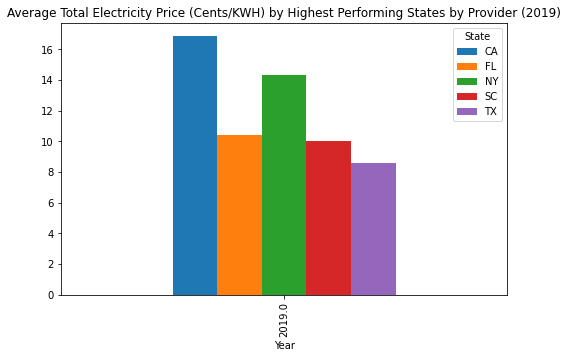

In [30]:
# Look at plot of provider prices per top 5 performing states in 2019
ig, ax = plt.subplots(figsize=(8,5))
merged_dfS.groupby(['Year', 'State'])['Total'].agg('sum').unstack().plot.bar(ax = ax)
plt.title('Average Total Electricity Price (Cents/KWH) by Highest Performing States by Provider (2019)')

Again for data exploration, we used the top 5 states from our gold standard dataset from Wood Mackenzie to explore average total electricity price for the total electric industry. We see that while TX was ranked the highest for solar installations in 2019, it actually has the lowest electricity price in 2019. Meanwhile, CA and NY (ranked 3rd and 5th respectively) top out as the 2 highest states for electricity price of the top 5 states with the most solar installations in 2019.

Text(0.5, 1.0, 'Average Total Electricity Price (Cents/KWH) by Highest Performing States by Provider (2015-2019)')

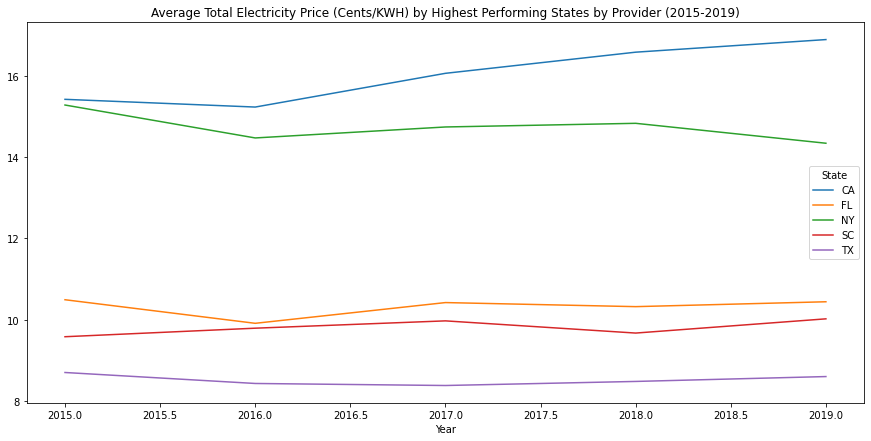

In [31]:
# Look at plot of provider prices per top 5 performing states from 2015-2019
ig, ax = plt.subplots(figsize=(15,7))
merged_dfy.groupby(['Year', 'State'])['Total'].agg('sum').unstack().plot(ax = ax)
plt.title('Average Total Electricity Price (Cents/KWH) by Highest Performing States by Provider (2015-2019)')

In this visualization, we then explored the average total electricity price by highest performing states in total electric industry over time - from 2015 to 2019 - to see the trend or fluctuation in prices over the last 5 years. We can see that on the whole, prices have remained relatively constant, except for CA whose prices have increased steadily from 2016-2019.

Text(0.5, 1.0, 'Average Electricity Price (Cents/KWH) by State by Segmentation (2019)')

<Figure size 1440x360 with 0 Axes>

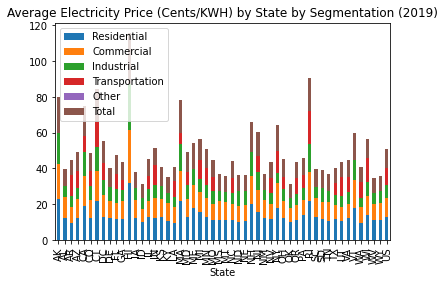

In [32]:
# Look at stacked bar plot of provider prices per state in 2019
plt.figure(figsize = (20, 5))
ep_filt2.plot.bar(stacked=True)
plt.legend(loc='upper left')
plt.title('Average Electricity Price (Cents/KWH) by State by Segmentation (2019)')

In this visualization, we wanted to see how each state's average total electricity price was divided when considering sectors. Therefore, we looked at a stacked bar plot for 2019.

Text(0.5, 1.0, 'Average Electricity Price (Cents/KWH) by State by Segmentation (1990-2019)')

<Figure size 2160x360 with 0 Axes>

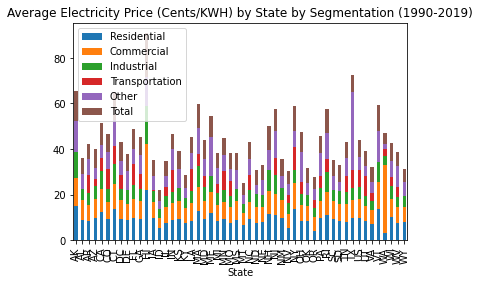

In [33]:
# Look at stacked bar plot of provider prices per state from 1990-2019
plt.figure(figsize = (30, 5))
all_avg.plot.bar(stacked=True)
plt.legend(loc='upper left')
plt.title('Average Electricity Price (Cents/KWH) by State by Segmentation (1990-2019)')

Similar to above, we wanted to see how each state's average total electricity price was divided when considering sectors. However in this case, we compared the 2019 plot to a stacked bar plot from 1990-2019.

# Existing Generation Data Exploration

## Existing Generation Data Set Features

### This dataset represents the average annual generation by state by type of producer and by energy source and tracks detailed state data on generation and fuel consumption from 1990-2019.

###Features:

Year - from 1990-2019

State - US states

Type of Producer - the producer category for each energy source (Combined Heat and Power, Industrial Power; Electric Generators, Electric Utilities; Combined Heat and Power, Commercial Power; Electric Generators, Independent Power Producers; Combined Heat and Power, Electric Power; Total Electric Power Industry).

Energy Source - the energy source of generation ( Wood and Wood Derived Fuels; Coal; Geothermal; Hydroelectric Conventional; Natural Gas; Petroleum; Wind; Solar Thermal and Photovoltaic; etc.) 

Generation - existing generation in MWH

###Source: U.S. Energy Information Administration (November 2020)

## Data Processing

In [34]:
# List header = 1 so that the first row becomes the header
exist_gen = pd.read_csv("Copy of annual_generation_state.csv", header = 1)

# Select only the columns we want since Unnamed columns have no data
exist_gen = exist_gen[['YEAR', 'STATE', 'TYPE OF PRODUCER', 'ENERGY SOURCE', 'GENERATION (Megawatthours)']]
#exist_gen.head(10)

In [35]:
## Remove commas in dataset then convert numeric columns from strings to floats
exist_gen['GENERATION (Megawatthours)'] = exist_gen['GENERATION (Megawatthours)'].astype(str).str.replace(',', '')
exist_gen['GENERATION (Megawatthours)'] = exist_gen['GENERATION (Megawatthours)'].astype(float)

# Convert MWH to KWH to match our other df's
exist_gen['GENERATION (Megawatthours)'] = 1000*exist_gen['GENERATION (Megawatthours)']

# Rename column
exist_gen = exist_gen.rename(columns= {'GENERATION (Megawatthours)': 'GENERATION (KWH)'})
#exist_gen.head()

# Filter df to find data for 2019 and Total Electric Industry
exgen_filt = exist_gen.loc[(exist_gen['YEAR'] == 2019) & 
                                (exist_gen['TYPE OF PRODUCER'] == 'Total Electric Power Industry'), :]
#exgen_filt.head()

In [36]:
# Filter df to find data for 2019 and Total Electric Industry
exgen_filt = exist_gen.loc[(exist_gen['YEAR'] == 2019) & 
                                (exist_gen['TYPE OF PRODUCER'] == 'Total Electric Power Industry'), :]
#exgen_filt.head()

In [37]:
# Locate US-total rows
#US = exgen_filt.loc[(exgen_filt['STATE'] == 'US-Total')]

# Drop rows containing US-Total because we don't want it in our dataset
exgen_filt = exgen_filt.drop([53415,53416,53417,53418,53419,53420,53421,53422,53423,53424,53425,53426,53427,53428])
#exgen_filt.head()

In [38]:
# Groupby state and energy source to get the mean of each energy source for each state in 2019 
ex_filt = exgen_filt.groupby(['STATE', 'ENERGY SOURCE'])['GENERATION (KWH)'].agg('mean')
ex_filt = pd.DataFrame(ex_filt)
#ex_filt

In [39]:
# Filter 2019 data set for only Solar as an energy source  to begin creating final dataframe in the following cells, and 
  # additionally to visually explore generation by state in 2019 using a bar plot
exgen_filt19 = exgen_filt.loc[(exgen_filt['ENERGY SOURCE'] == 'Solar Thermal and Photovoltaic')]
#exgen_filt19.head()

In [40]:
# Filter df to find data for 2017, Total Electric Industry and Solar
exgen_filt17 = exist_gen.loc[(exist_gen['YEAR'] == 2017) & 
                                (exist_gen['TYPE OF PRODUCER'] == 'Total Electric Power Industry')&
                             (exist_gen['ENERGY SOURCE'] == 'Solar Thermal and Photovoltaic'), :]
# Drop US Total because we only want states
exgen_filt17 = exgen_filt17.drop([49193])
#exgen_filt17.head()

In [41]:
# Select state and generation (kwh) for 2019 from 2019 solar generation dataframe, since these are the main features we want
exgen_filt19 = exgen_filt19[['STATE', 'GENERATION (KWH)']]
exgen_filt19 = exgen_filt19.rename(columns = {'GENERATION (KWH)':'GENERATION (KWH) 2019'}) 
#exgen_filt19.head()

# Select state and generation (kwh) for 2017 from 2017 solar generation dataframe, since these are the main features we want
exgen_filt17 = exgen_filt17[['STATE', 'GENERATION (KWH)']]
exgen_filt17 = exgen_filt17.rename(columns = {'GENERATION (KWH)':'GENERATION (KWH) 2017'}) 
#exgen_filt17.head()

# Merge 2017 and 2019 solar generation datasets
exgen_17_19 = exgen_filt19.merge(exgen_filt17,how = 'outer')
#exgen_17_19.head()

In [42]:
# Create new column for calculated percent change from 2017-2019
    # We want to understand how total solar generation has changed over time, from 2017-2019
exgen_17_19['% Generation Change (17-19)'] = 100*((exgen_17_19['GENERATION (KWH) 2019'] - exgen_17_19['GENERATION (KWH) 2017'])/exgen_17_19['GENERATION (KWH) 2017'])
exgen_17_19['AV % Generation Change (17-19)'] = exgen_17_19['% Generation Change (17-19)'].abs() 

# Normalize total average price in 2019 
exgen_17_19['GENERATION (KWH) 2019 - Norm'] = (exgen_17_19['GENERATION (KWH) 2019'] -  exgen_17_19['GENERATION (KWH) 2019'].min()) / (exgen_17_19['GENERATION (KWH) 2019'].max() - exgen_17_19['GENERATION (KWH) 2019'].min())

# Rename final df
eg_final = exgen_17_19

# Find the mean of our % change from 2017-2019 column and use it to replace any NaN values
column_mean = eg_final['% Generation Change (17-19)'].mean()
eg_final = eg_final.fillna(column_mean)
eg_final.head()

,STATE,GENERATION (KWH) 2019,GENERATION (KWH) 2017,% Generation Change (17-19),AV % Generation Change (17-19),GENERATION (KWH) 2019 - Norm
0,AL,3.849390e+08,1.806880e+08,113.040711,113.040711,0.013535
1,AR,2.103330e+08,3.081200e+07,582.633390,582.633390,0.007371
2,AZ,5.278019e+09,4.942001e+09,6.799230,6.799230,0.186252
3,CA,2.833151e+10,2.435292e+10,16.337246,16.337246,1.000000
4,CO,1.218220e+09,9.544980e+08,27.629393,27.629393,0.042948


In [43]:
# Look at descriptive statistics for our final dataframe.
eg_final.describe()

,GENERATION (KWH) 2019,GENERATION (KWH) 2017,% Generation Change (17-19),AV % Generation Change (17-19),GENERATION (KWH) 2019 - Norm
count,4.700000e+01,4.700000e+01,47.000000,47.000000,47.000000
mean,1.530571e+09,1.133763e+09,321.374856,323.502632,0.053973
std,4.308966e+09,3.670196e+09,1304.068033,1303.530379,0.152099
min,1.506000e+06,3.213749e+02,-37.845646,1.116229,0.000000
25%,5.426000e+07,2.067500e+07,20.069881,23.502391,0.001862
50%,2.681380e+08,9.234200e+07,82.993677,82.993677,0.009412
75%,1.164248e+09,6.922990e+08,211.036931,211.036931,0.041043
max,2.833151e+10,2.435292e+10,8991.060291,8991.060291,1.000000


## Data Visualization

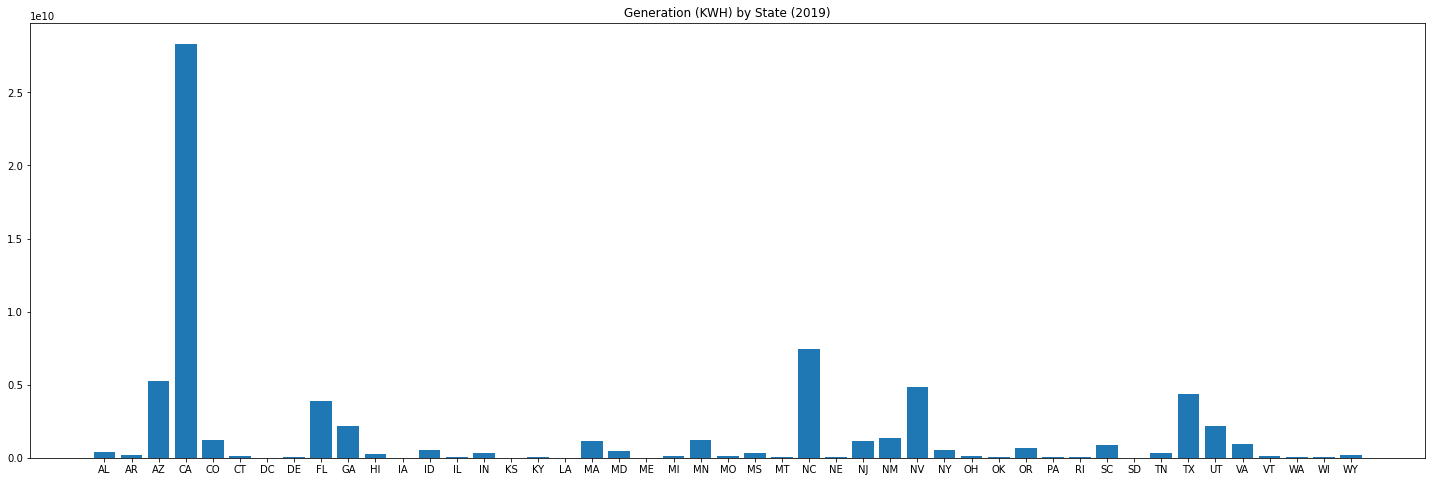

In [44]:
# Plot generation x state for 2019
plt.figure(figsize = (25, 8))
plt.bar(exgen_filt19['STATE'], exgen_filt19['GENERATION (KWH) 2019'])
plt.title('Generation (KWH) by State (2019)')
plt.show()

This plot was created to visually explore generation from solar thermal and voltaic energy sources by state in 2019. This clearly shows that CA has the highest generation for solar with NC a far second.

Text(0.5, 1.0, 'Existing Electricity Generation(KWh)')

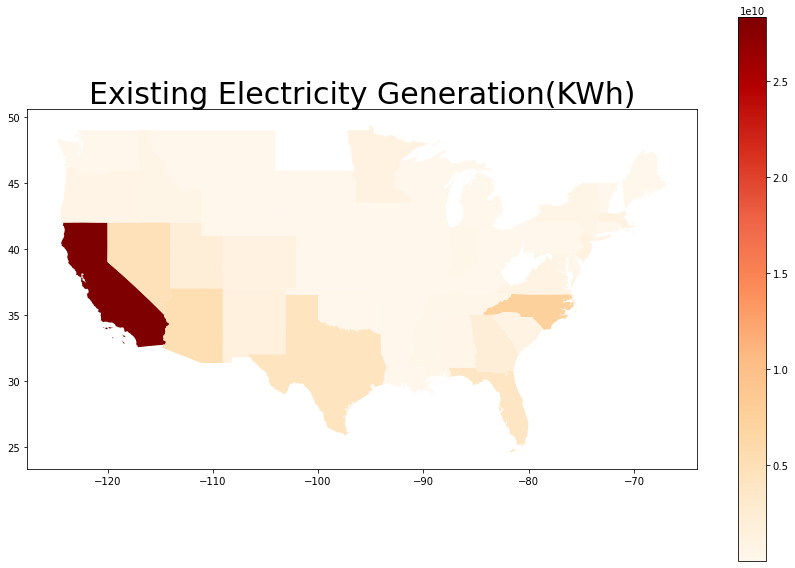

In [45]:
eg_final.rename(mapper={'STATE': 'State'}, axis=1, inplace=True)
usa_generation = usa.merge(eg_final[['State', 'GENERATION (KWH) 2019']], how='inner', on=['State'])
fig, ax = plt.subplots(figsize=(15, 10))
usa_generation.plot(column='GENERATION (KWH) 2019',  cmap='OrRd', legend=True, ax=ax)
ax.set_title('Existing Electricity Generation(KWh)', fontsize=30)

In this visualization, we explored our final data frame using a US heat map for existing generation across states for solar thermal and voltaic energy sources. This was another way to view the data in the previous bar chart visually. Again, we can see that CA has the highest existing generation by a significant amount when compared to the other states.

# Overall Analysis

## Data Processing


In [46]:
# Merge four dataset together
eg_final.rename(mapper={'STATE': 'State'}, axis=1, inplace=True)
solar_data = ep_final.merge(eg_final, how='inner', on=['State'])
solar_data = solar_data.merge(weather_data_norm[['State', '% Sun_norm',	'Clear Days_norm',	'# Days with Snow_norm',	'Avg °F_norm']], how='inner', on=['State'])
solar_data = solar_data.merge(usa_tech_pot[['State', 'General_Electric_Generation']],
                              how='inner', on=['State'])

# Rename all the column names to make them consistent and easy to understand.
solar_data.rename(mapper={'General_Electric_Generation': 'Electricity_Generation_Potential(GWh)',
                         'Total Average Price 2019 (Cents/KWH)': '$Electricity_2019(Cents/KWh)', 
                         'Total Average Price 2017 (Cents/KWH)': '$Electricity_2017(Cents/KWh)',
                         '% change in price (17-19)': '$Electricity_%Change(17-19)', 
                         'AV % change in price (17-19)': '$Electricity_Av_%Change(17-19)',
                         'Total Average Price 2019 - Norm': '$Electricity_2019_Norm',
                         'GENERATION (KWH) 2019': 'Electricity_Generation_2019(KWh)',
                         'GENERATION (KWH) 2017': 'Electricity_Generation_2017(KWh)',
                         '% Generation Change (17-19)': 'Electricity_Generation_%Change(17-19)',
                         'AV % Generation Change (17-19)': 'Electricity_Generation_Av_%Change(17-19)',
                         'GENERATION (KWH) 2019 - Norm': 'Electricity_Generation_Norm_2019',
                         '% Sun_norm': '%Sunny_Norm',
                          'Clear Days_norm':'Clear_Days_Norm',
                         '# Days with Snow_norm': '#Days_With_Snow_Norm',
                         'Avg °F_norm': 'Average_Temp_Norm'
                         }, axis=1, inplace=True)
solar_data.head()

,State,$Electricity_2019(Cents/KWh),$Electricity_2017(Cents/KWh),$Electricity_%Change(17-19),$Electricity_Av_%Change(17-19),$Electricity_2019_Norm,Electricity_Generation_2019(KWh),Electricity_Generation_2017(KWh),Electricity_Generation_%Change(17-19),Electricity_Generation_Av_%Change(17-19),Electricity_Generation_Norm_2019,%Sunny_Norm,Clear_Days_Norm,#Days_With_Snow_Norm,Average_Temp_Norm,Electricity_Generation_Potential(GWh)
0,AL,9.83,9.83,0.000000,0.000000,0.100904,3.849390e+08,1.806880e+08,113.040711,113.040711,0.013535,0.386364,0.303704,0.987952,0.820862,3758166.0
1,AR,8.22,8.26,-0.484262,0.484262,0.024274,2.103330e+08,3.081200e+07,582.633390,582.633390,0.007371,0.454545,0.481481,0.942771,0.766440,5023835.0
2,AZ,10.52,10.64,-1.127820,1.127820,0.133746,5.278019e+09,4.942001e+09,6.799230,6.799230,0.186252,1.000000,1.000000,0.995482,0.764172,24556070.0
3,CA,16.89,16.06,5.168120,5.168120,0.436935,2.833151e+10,2.435292e+10,16.337246,16.337246,1.000000,0.613636,0.651852,1.000000,0.743764,17699252.0
4,CO,10.17,9.99,1.801802,1.801802,0.117087,1.218220e+09,9.544980e+08,27.629393,27.629393,0.042948,0.681818,0.577778,0.712349,0.419501,19452241.0


## Data Visualization of Development Opportunity & Benefit Opportunity

<ipython-input-47-a198a4becdfc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dev_oppo_data['Development_Opportunity(GWh)'] = dev_oppo_data['Electricity_Generation_Potential(GWh)'] - dev_oppo_data['Electricity_Generation_2019(KWh)']/10**6


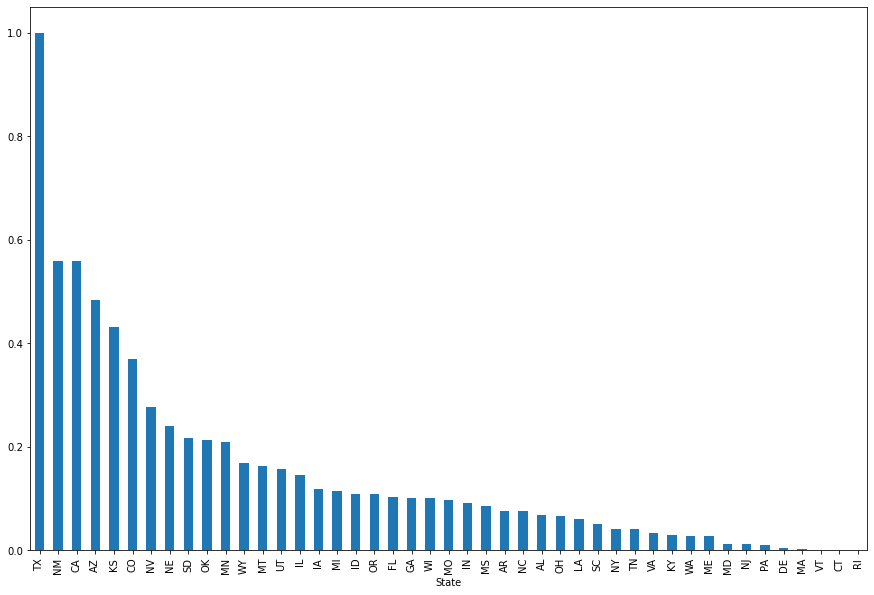

In [47]:
# The first equition: Explore development opportunity
dev_oppo_data = solar_data[['State', 'Electricity_Generation_2019(KWh)', 'Electricity_Generation_Potential(GWh)']]

dev_oppo_data['Development_Opportunity(GWh)'] = dev_oppo_data['Electricity_Generation_Potential(GWh)'] - dev_oppo_data['Electricity_Generation_2019(KWh)']/10**6 
dev_oppo_data = dev_oppo_data.merge(solar_data[['State', '$Electricity_2019(Cents/KWh)']], how='inner', on=['State'])
dev_oppo_data['Benefit_Opportunity(Cents)'] = dev_oppo_data['$Electricity_2019(Cents/KWh)'] * 10**6 * dev_oppo_data['Development_Opportunity(GWh)']
dev_oppo_data['Benefit_Opportunity_Norm'] = (dev_oppo_data['Benefit_Opportunity(Cents)'] - dev_oppo_data['Benefit_Opportunity(Cents)'].min()) / (dev_oppo_data['Benefit_Opportunity(Cents)'].max() - dev_oppo_data['Benefit_Opportunity(Cents)'].min())

# Visualize the ranking of benifit opportunity, just from the aspect of potential of benefit that solar energy can make
benifit_ranking = dev_oppo_data.groupby(['State']).agg({'Benefit_Opportunity_Norm':sum}).sort_values('Benefit_Opportunity_Norm',ascending = False)
benifit_ranking['Benefit_Opportunity_Norm'].plot.bar(figsize=(15,10))

## Data Visualization of Market Factor

<ipython-input-48-18cb6fe52ec5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  market_factor_data['$Electricity_%Change_Norm(17-19)'] = (market_factor_data['$Electricity_%Change(17-19)'] - market_factor_data['$Electricity_%Change(17-19)'].min()) / (market_factor_data['$Electricity_%Change(17-19)'].max() - market_factor_data['$Electricity_%Change(17-19)'].min())
<ipython-input-48-18cb6fe52ec5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  market_factor_data['Electricity_Generation_%Change_Norm(17-19)'] 

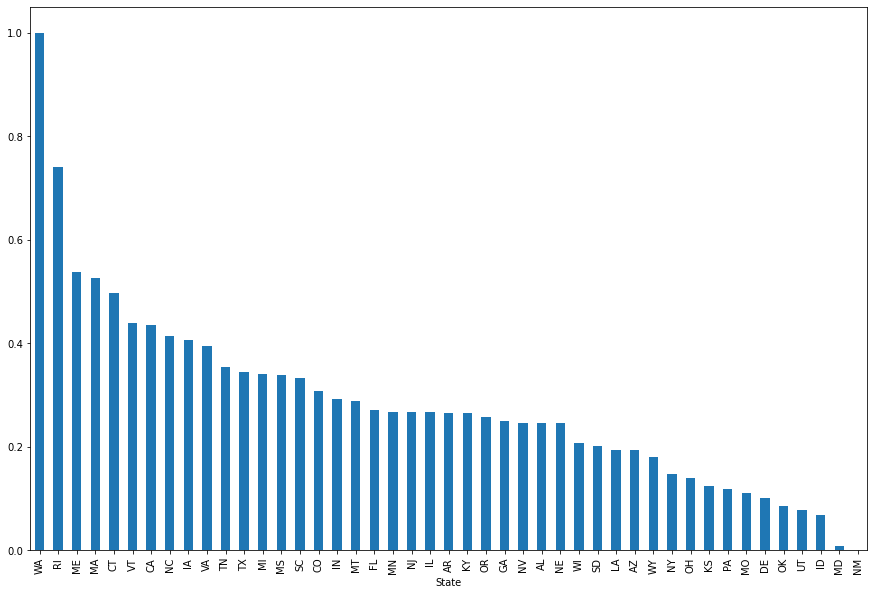

In [48]:
# The thrid equition: Explore market factor
market_factor_data = solar_data[['State', '$Electricity_%Change(17-19)', 'Electricity_Generation_%Change(17-19)']]
market_factor_data['$Electricity_%Change_Norm(17-19)'] = (market_factor_data['$Electricity_%Change(17-19)'] - market_factor_data['$Electricity_%Change(17-19)'].min()) / (market_factor_data['$Electricity_%Change(17-19)'].max() - market_factor_data['$Electricity_%Change(17-19)'].min())
market_factor_data['Electricity_Generation_%Change_Norm(17-19)'] = (market_factor_data['Electricity_Generation_%Change(17-19)'] - market_factor_data['Electricity_Generation_%Change(17-19)'].min()) / (market_factor_data['Electricity_Generation_%Change(17-19)'].max() - market_factor_data['Electricity_Generation_%Change(17-19)'].min())
market_factor_data['Market_Trend_Factor'] = market_factor_data['Electricity_Generation_%Change_Norm(17-19)'] + market_factor_data['$Electricity_%Change_Norm(17-19)']
market_factor_data['Market_Trend_Factor_Norm'] = (market_factor_data['Market_Trend_Factor'] - market_factor_data['Market_Trend_Factor'].min()) / (market_factor_data['Market_Trend_Factor'].max() - market_factor_data['Market_Trend_Factor'].min())

# Visualize market trend factor, just from the aspect of market trend(electricity uptaking trend and electricity price trend)
market_ranking = market_factor_data.groupby(['State']).agg({'Market_Trend_Factor_Norm':sum}).sort_values('Market_Trend_Factor_Norm',ascending = False)
market_ranking['Market_Trend_Factor_Norm'].plot.bar(figsize=(15,10))

## Data Visualization of Weather Factor

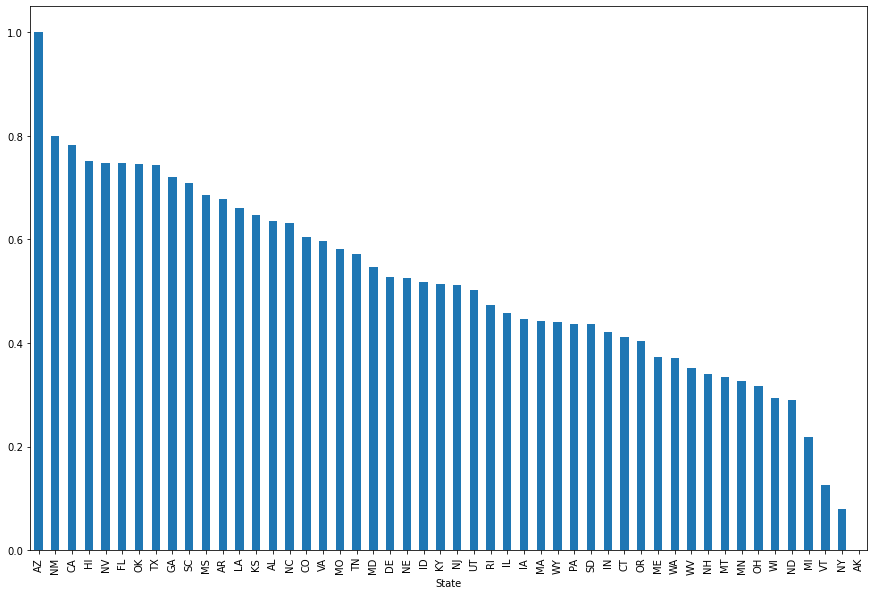

In [49]:
# Weather Factor
weather_data_norm['weather_factor'] = weather_data_norm['% Sun_norm'] + weather_data_norm['Clear Days_norm'] + weather_data_norm['# Days with Snow_norm'] + weather_data_norm['Avg °F_norm']
weather_data_norm['Weather_Factor_Norm'] = (weather_data_norm['weather_factor'] - weather_data_norm['weather_factor'].min()) / (weather_data_norm['weather_factor'].max() - weather_data_norm['weather_factor'].min())

weather_factor_rank = weather_data_norm.groupby(['State']).agg({'Weather_Factor_Norm':sum}).sort_values('Weather_Factor_Norm',ascending = False)
weather_factor_rank['Weather_Factor_Norm'].plot.bar(figsize=(15,10))

## Data Visualization of All Combined Factors

<BarContainer object of 45 artists>

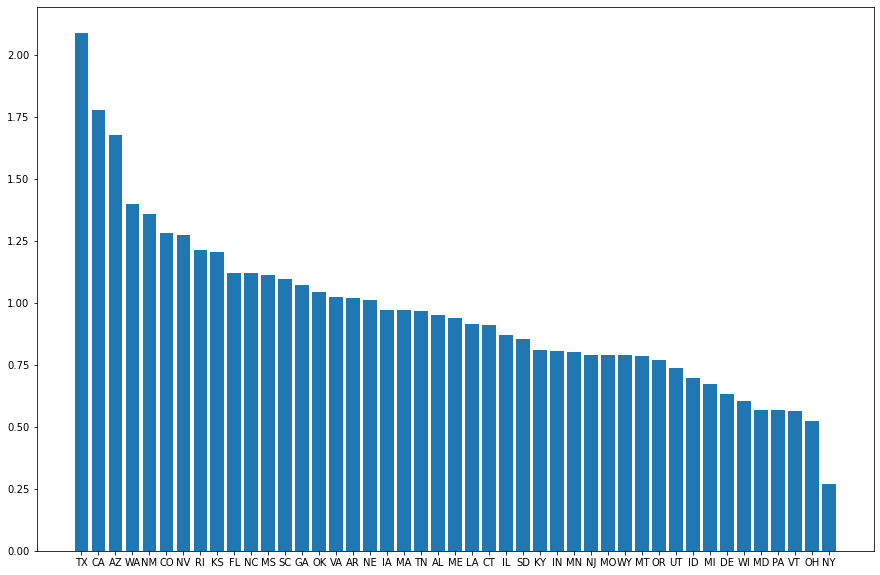

In [50]:
# Add weather factor and development opportunity together
solar_factors = weather_data_norm[['State', 'Weather_Factor_Norm']]
solar_factors = solar_factors.merge(dev_oppo_data[['State', 'Benefit_Opportunity_Norm']], how='inner', on=['State'])
solar_factors = solar_factors.merge(market_factor_data[['State', 'Market_Trend_Factor_Norm']], how='inner', on=['State'])
solar_factors['Overall_Factors'] = solar_factors['Weather_Factor_Norm'] + solar_factors['Benefit_Opportunity_Norm'] + solar_factors['Market_Trend_Factor_Norm']
solar_factors.sort_values(by=['Overall_Factors'], inplace=True, ascending=False)

fig,ax = plt.subplots(figsize = (15, 10))
ax.bar(x=solar_factors['State'], height=solar_factors['Overall_Factors'])

Text(0.5, 1.0, 'Difference Between Golden Standard Ranking and Our Ranking')

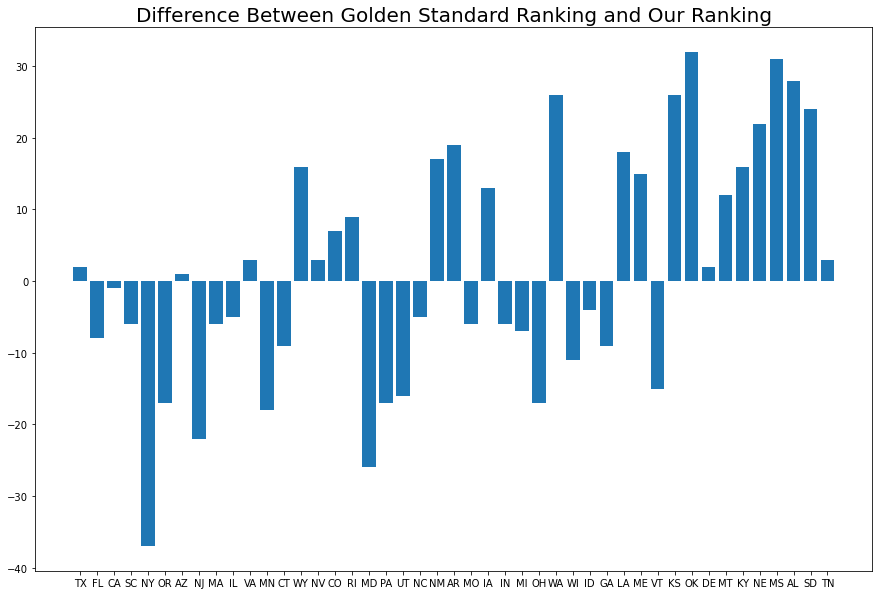

In [51]:
solar_factors.reset_index(drop=True, inplace=True)
solar_factors['Ranking'] = solar_factors.index + 1
golden_rank = pd.read_csv('Wood Mackenzie State Solar PV Installation Rankings Q2 2020.csv', header=1)
golden_rank = golden_rank[['State', '2019']]
golden_rank.rename(mapper={'2019': 'Ranking_golden_standard'}, axis=1, inplace=True)
golden_rank = golden_rank.merge(solar_factors[['State', 'Ranking']], how='inner', on=['State'])
golden_rank['Difference'] = golden_rank['Ranking_golden_standard'] - golden_rank['Ranking']

fig,ax = plt.subplots(figsize = (15, 10))
ax.bar(x=golden_rank['State'], height=golden_rank['Difference'])
ax.set_title('Difference Between Golden Standard Ranking and Our Ranking', fontsize=20)

From the graph we can we can see how our model compared with the golden standard.

The graph shows the difference in numerical displacement between the two ranking sysytems.

We see some interesting aspects:


1.  Top 5 cities align well compared to the bottom 5.
2.   WT has a much higher rating in our model from the outlier from the current model.
3.   Bottom 5 states has a similar performance.
4.   NY,NC, MD,MI performance is bad in our model due to lack of considering policy in the model.


Text(0.5, 1.0, 'Difference of Bottom 10 States')

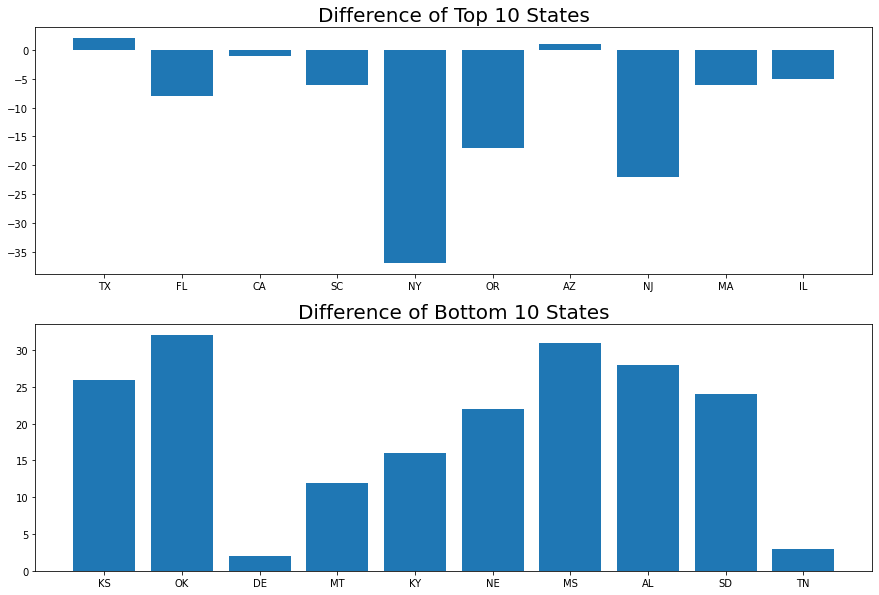

In [52]:
# Top 10 and bottom 10 states
fig,ax = plt.subplots(2, 1, figsize=(15, 10))
ax[0].bar(x=golden_rank.iloc[:10]['State'], height=golden_rank.iloc[:10]['Difference'])
ax[0].set_title('Difference of Top 10 States', fontsize=20)
ax[1].bar(x=golden_rank.iloc[-10:]['State'], height=golden_rank.iloc[-10:]['Difference'])
ax[1].set_title('Difference of Bottom 10 States', fontsize=20)

The graphs shows the difference in numerical displacement between the two ranking sysytems.

From the graph of Top 10 States we can see the following:

1.   Most of the States capture the essence of the golden model well and match relative to the ranking from the golden standard.
2.   NY,NJ and OR do no do well, this is mainly from the poilicy standpoint.

From the graph of Bottom 10 States we can see the following:


1.   No clear pattern an be seen, however there are pockets of information with is important.
2.   DE is capture in our model very well as a low ranking State which shows a positive sign.
2.   MT,KY,NE,MS,AL,SD all show that the model does not align with these states and that different factor is not captured in the model.
